# EE 341 - Lab 2
## Introduction to Image Processing
## Khoa Tran and Anup Paudel

### Task 1: Displaying Image

In [24]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math

<function matplotlib.pyplot.show(*args, **kw)>

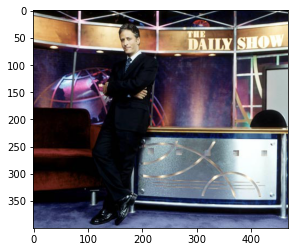

In [5]:
# Load the image.
image = plt.imread('DailyShow.jpg')

# Display the image.
plt.figure()
plt.imshow(image)
plt.show

In [6]:
from skimage import color

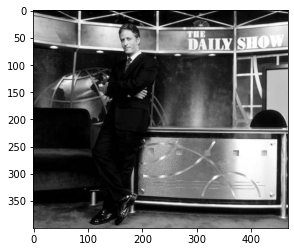

In [7]:
# Convert the image to grayscale.
image_gray = color.rgb2gray(image)

#Display the grayscale image.
plt.figure()
plt.imshow(image_gray, cmap = 'gray')
plt.show()

In [8]:
# Dimension of the image.
length, width = np.shape(image_gray)
print("length: " + str(length))
print("width: " + str(width))

length: 400
width: 468


## Task 2: Edge Detection

In [9]:
from scipy import ndimage

In [10]:
# Sobel vertical edge detection convolution kernel.
h1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Sobel horizontal edge detection convolution kernel.
h2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

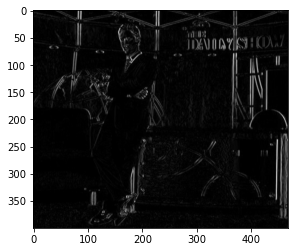

In [11]:
# Edge detection using sobel vertical edge detection convolution kernel.
M1 = ndimage.filters.convolve(image_gray, h1)
row_gradient_magnitude = np.abs(M1)

plt.figure()
plt.imshow(row_gradient_magnitude, cmap = 'gray')
plt.show()

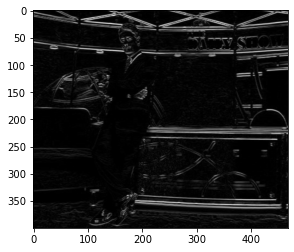

In [12]:
# Edge detection using sobel horizontal edge detection convolution kernel.
M2 = ndimage.filters.convolve(image_gray, h2)
column_gradient_magnitude = np.abs(M2)

plt.figure()
plt.imshow(column_gradient_magnitude, cmap = 'gray')
plt.show()

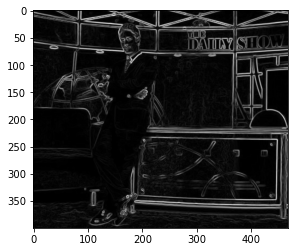

In [13]:
overall_gradient_magnitude = np.sqrt(np.square(M1) + np.square(M2))

plt.figure()
plt.imshow(overall_gradient_magnitude, cmap = 'gray')
plt.show()

## Custom Images

In [14]:
custom_image = plt.imread('elon.jpg')

# Display the image.
plt.figure()
plt.imshow(custom_image)
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'elon.jpg'

In [15]:
# Convert the image to grayscale.
custom_image_gray = color.rgb2gray(custom_image)

#Display the grayscale image.
plt.figure()
plt.imshow(custom_image_gray, cmap = 'gray')
plt.show()

NameError: name 'custom_image' is not defined

In [16]:
# Edge detection using sobel vertical edge detection convolution kernel.
custom_M1 = ndimage.filters.convolve(custom_image_gray, h1)
row_gradient_magnitude = np.abs(custom_M1)

plt.figure()
plt.imshow(row_gradient_magnitude, cmap = 'gray')
plt.show()

NameError: name 'custom_image_gray' is not defined

In [17]:
# Edge detection using sobel horizontal edge detection convolution kernel.
custom_M2 = ndimage.filters.convolve(custom_image_gray, h2)
column_gradient_magnitude = np.abs(custom_M2)

plt.figure()
plt.imshow(column_gradient_magnitude, cmap = 'gray')
plt.show()

NameError: name 'custom_image_gray' is not defined

In [18]:
overall_gradient_magnitude = np.sqrt(np.square(custom_M1) + np.square(custom_M2))

plt.figure()
plt.imshow(overall_gradient_magnitude, cmap = 'gray')
plt.show()

NameError: name 'custom_M1' is not defined

We decided to convolve the image using all three gradient magnitude, as we were unsure if the image had higher vertical or horizontal edges. After the careful analysis of the edge images, it does seem like the image has higher vertical edge. 

## Task 3: Downscaling

In [35]:
def downscaling(image, S):
    image_gray = color.rgb2gray(image)
    length = np.shape(image_gray)[0]
    width = np.shape(image_gray)[1]
    
    downsized_image = []
    
    for x in range(0,length,S):
        row = []
        for y in range(0,width,S):
            if (S % 2) == 0:
                pixel = image_gray[x,y]
                row.append(pixel)
                
            else:
                pixel = image_gray[math.ceil(x + int(S/2)), math.ceil(y + int(S/2))]
                # Keep getting error on the following function
                # pixel = image_gray[x + (int(S/2)) + 1, y + (int(S/2)) + 1]
                row.append(pixel)
        downsized_image.append(row)
    
    return downsized_image

In [36]:
def average_downscaling(images, S):
    image_gray = color.rgb2gray(images)
    length = np.shape(image_gray)[0]
    width = np.shape(image_gray)[1]
    
    downsized_image = []
    
    for x in range(0,length,S):
        row = []
        for y in range(0,width,S):
            mean = image_gray[x:x+S, y:y+S].mean()
            row.append(mean)
        downsized_image.append(row)
        
    return downsized_image

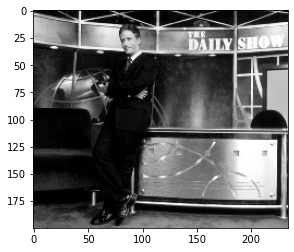

In [37]:
plt.figure()
plt.imshow(downscaling(image, 2), cmap = 'gray')
plt.show()

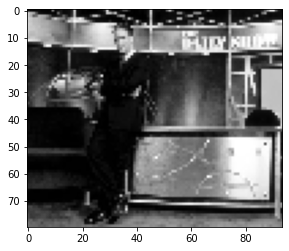

In [38]:
plt.figure()
plt.imshow(downscaling(image, 5), cmap = 'gray')
plt.show()

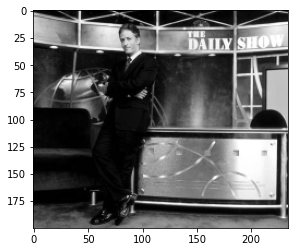

In [39]:
plt.figure()
plt.imshow(average_downscaling(image, 2), cmap = 'gray')
plt.show()

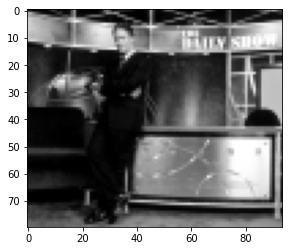

In [40]:
plt.figure()
plt.imshow(average_downscaling(image, 5), cmap = 'gray')
plt.show()

## Task 4: Flipping

We guessed that X[N-n+1, m] will flip the image upside down, X[n, M-m+1] will flip the image left to right, and X[N-n+1, M-m+1] will flip the image upside down and left to right. 

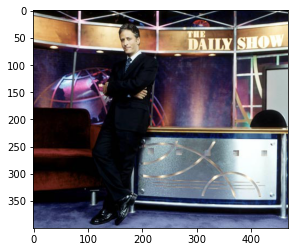

In [41]:
plt.figure()
plt.imshow(image)
plt.show()

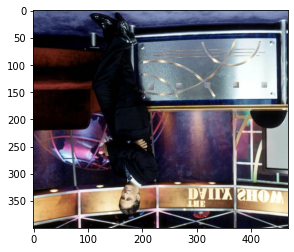

In [47]:
from numpy import asarray
array = asarray(image)
arrayi = array[::-1,:]
plt.figure()
plt.imshow(arrayi)
plt.show()

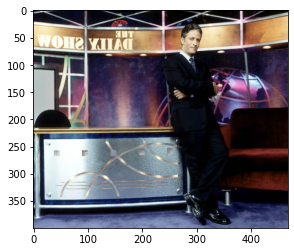

In [48]:
arrayii = array[:,::-1]
plt.figure()
plt.imshow(arrayii)
plt.show()

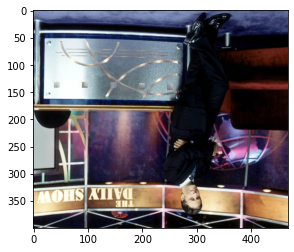

In [49]:
# X[N-n+1, M-m+1]
arrayiii = array[::-1,::-1]
plt.figure()
plt.imshow(arrayiii)
plt.show()

## Task 5: Upscaling

In [50]:
from skimage import transform

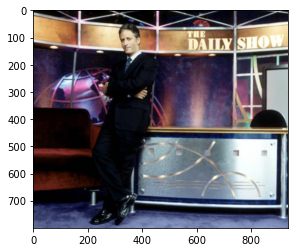

In [51]:
rows = np.shape(image)[0]
cols = np.shape(image)[1]

result = transform.resize(image, (2 * rows, 2 * cols), order = 1)

plt.figure()
plt.imshow(result)
plt.show()

In [47]:
# Verification of dimension
print("length: " + str(np.shape(result)[0]))
print("width: " + str(np.shape(result)[1]))

length: 800
width: 936
